# Sorting Algorithms: Top 10 Widely Used

This notebook presents 10 of the most important and widely-used sorting algorithms, categorized into different types based on their techniques.  
Each algorithm is explained in detail with an example, discussion of complexity, real-world applications, and advantages or disadvantages.

The categories we consider are:
- Simple Sorts for Special Cases
- Divide and Conquer Sorts
- Heap-Based Sorts
- Non-Comparison Based Sorts

We will also benchmark all these algorithms on varying input sizes and analyze their time complexities through log-log plots and fitted slopes.

---


# Simple Sorts for Special Cases

Simple sorts are algorithms that are conceptually easy to understand and implement.  
While they are generally inefficient for large datasets (O(n²) time complexity),  
they perform very well on small or nearly sorted datasets.  
They are often used as a building block inside more complex hybrid sorting algorithms.


## Simple sorts for special cases

## Shell Sort

**How it works**:  
Shell Sort is an optimization over Insertion Sort.  
It allows the exchange of far apart elements early on to reduce the total number of movements.  
It works by:
1. Choosing a gap sequence (typically starting with n/2).
2. Performing a gapped insertion sort for each gap size.
3. Reducing the gap and repeating the process until the gap becomes 1.

**Step-by-Step Example**:  
Given array `[12, 34, 54, 2, 3]`
- First gap = 2:  
  - Compare elements 2 apart and sort.
- New sequence after gap 2 pass: `[12, 3, 34, 2, 54]`
- Gap reduced to 1 → normal insertion sort now.

**Complexity**:
- Depends heavily on the gap sequence.
- Best known: ~O(n^(3/2)) or better with optimized gaps (Shell's original gap: O(n²)).

**Applications**:
- Good for medium-sized arrays.
- Faster than Insertion Sort and simpler to code compared to advanced sorts.

**Pros**:
- Easy to implement.
- Performs much better than O(n²) sorts for large inputs.

**Cons**:
- Not stable (does not preserve order of equal elements).
- Complexity analysis is complicated.

---


In [11]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

## Shell Sort

**How it works**:  
Shell Sort is an optimization over Insertion Sort.  
It allows the exchange of far apart elements early on to reduce the total number of movements.  
It works by:
1. Choosing a gap sequence (typically starting with n/2).
2. Performing a gapped insertion sort for each gap size.
3. Reducing the gap and repeating the process until the gap becomes 1.

**Step-by-Step Example**:  
Given array `[12, 34, 54, 2, 3]`
- First gap = 2:  
  - Compare elements 2 apart and sort.
- New sequence after gap 2 pass: `[12, 3, 34, 2, 54]`
- Gap reduced to 1 → normal insertion sort now.

**Complexity**:
- Depends heavily on the gap sequence.
- Best known: ~O(n^(3/2)) or better with optimized gaps (Shell's original gap: O(n²)).

**Applications**:
- Good for medium-sized arrays.
- Faster than Insertion Sort and simpler to code compared to advanced sorts.

**Pros**:
- Easy to implement.
- Performs much better than O(n²) sorts for large inputs.

**Cons**:
- Not stable (does not preserve order of equal elements).
- Complexity analysis is complicated.

---


In [12]:
def shell_sort(arr):
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2
    return arr

# Divide and Conquer Sorts

Divide and conquer algorithms solve problems by breaking them into smaller sub-problems, solving the sub-problems recursively, and then combining the results.

In sorting, divide and conquer generally involves:
- Dividing the array into halves,
- Sorting the halves independently,
- Merging or combining the results efficiently.

This category includes highly efficient and commonly used sorting techniques for general-purpose data.

## Merge Sort

**How it works**:  
Merge Sort divides the input array into two halves, sorts each half recursively, and then merges the two sorted halves into a single sorted array.  
It follows the perfect divide-and-conquer strategy with guaranteed O(n log n) performance.

**Step-by-Step Example**:  
Given array `[38, 27, 43, 3, 9, 82, 10]`
- Divide into `[38, 27, 43]` and `[3, 9, 82, 10]`
- Divide further until single elements remain
- Merge sorted subarrays: `[27,38,43]` and `[3,9,10,82]`
- Final merge: `[3,9,10,27,38,43,82]`

**Complexity**:
- Best, Average, Worst Case: O(n log n)

**Applications**:
- Sorting linked lists (due to sequential access).
- External sorting (data too large to fit in memory).
- Stable sort requirements.

**Pros**:
- Always O(n log n).
- Stable sort.
- Good for very large data.

**Cons**:
- Requires O(n) extra space for arrays.

---

In [13]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

## Quick Sort

**How it works**:  
Quick Sort is one of the fastest and most widely used sorting algorithms.  
It picks an element as a pivot and partitions the array around the pivot, such that elements smaller than the pivot are on the left, and elements greater are on the right.  
The process is recursively repeated on the left and right subarrays.

Choosing a good pivot (e.g., random pivot, median of three) is key to avoiding worst-case performance.

**Step-by-Step Example**:  
Given array `[10, 7, 8, 9, 1, 5]`
- Choose pivot = 5
- Partition: `[1] [5] [10,7,8,9]`
- Recursively sort left (`[1]`) and right (`[10,7,8,9]`)
- Continue until the entire array is sorted: `[1,5,7,8,9,10]`

**Complexity**:
- Best Case: O(n log n)
- Average Case: O(n log n)
- Worst Case: O(n²) (e.g., already sorted input with bad pivot choice)

**Applications**:
- Widely used in system libraries (C, C++, Java).
- Default in-place sort for general-purpose data.
- Good for arrays and in-memory data where stability is not required.

**Pros**:
- Very fast in practice.
- In-place sorting (requires O(log n) extra stack space).

**Cons**:
- Unstable.
- O(n²) worst case (rare with good pivot strategies).

---

In [14]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Heap-Based Sorts

Heap-based sorting algorithms use heap data structures (usually max-heaps) to organize elements so that the largest (or smallest) element is easily accessible.  
They typically involve building a heap and then extracting elements one-by-one into sorted order.

Heap-based sorts are very efficient for large arrays when extra memory usage needs to be minimal.

## Heap Sort

**How it works**:  
Heap Sort first transforms the entire array into a max-heap (where parent nodes are greater than their children).  
Then, it repeatedly swaps the first element (the maximum) with the last element and rebuilds the heap for the remaining elements.

**Step-by-Step Example**:  
Given array `[4, 10, 3, 5, 1]`
- Build Max Heap: `[10, 5, 3, 4, 1]`
- Swap 10 with 1: `[1,5,3,4,10]`
- Heapify remaining `[1,5,3,4]`
- Continue swapping and heapifying until sorted.

**Complexity**:
- Best, Average, Worst Case: O(n log n)

**Applications**:
- Priority queues (where frequent extract-max or extract-min needed).
- Sorting large datasets when memory is constrained.
- Used in embedded systems.

**Pros**:
- In-place sorting (O(1) extra space).
- Guarantees O(n log n) time.

**Cons**:
- Not stable (equal elements might change order).
- Slower than QuickSort in practice for small datasets.

---


In [15]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

## IntroSort

**How it works**:  
IntroSort (short for Introspective Sort) begins with Quick Sort, but monitors the recursion depth.  
If the depth becomes too large (indicating bad pivot choices and risk of O(n²) behavior), it switches to Heap Sort to guarantee O(n log n) worst-case performance.

Thus, it combines the speed of Quick Sort with the worst-case safety of Heap Sort.

**Step-by-Step Example**:
- Start with Quick Sort.
- If recursion depth exceeds 2×log₂(n) → switch to Heap Sort.
- Otherwise, continue Quick Sorting subarrays.

**Complexity**:
- Best, Average, Worst Case: O(n log n)

**Applications**:
- Used in C++ Standard Template Library (STL) `std::sort()`.
- Used in Java's Arrays.sort() (for primitives).
- Excellent for general-purpose sorting.

**Pros**:
- Very fast for most inputs (like Quick Sort).
- Safe fallback prevents worst-case blowups.
- In-place sorting (O(log n) space for recursion).

**Cons**:
- Slightly more complicated to implement compared to pure QuickSort or HeapSort.

---

In [16]:
import sys
sys.setrecursionlimit(10**6)

def introsort(arr):
    maxdepth = (len(arr).bit_length() - 1) * 2
    _introsort(arr, 0, len(arr)-1, maxdepth)

def _introsort(arr, start, end, maxdepth):
    if start < end:
        if maxdepth == 0:
            heap_sort(arr[start:end+1])
        else:
            p = partition(arr, start, end)
            _introsort(arr, start, p-1, maxdepth-1)
            _introsort(arr, p+1, end, maxdepth-1)

def partition(arr, start, end):
    pivot = arr[end]
    i = start
    for j in range(start, end):
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[end] = arr[end], arr[i]
    return i

# Non-Comparison-Based Sorts

Unlike traditional sorts that rely on comparing elements, non-comparison-based sorts work by using properties of the input, like integer ranges or digits, to organize data more efficiently.

They can achieve linear time complexity (O(n)) under suitable conditions, often outperforming comparison-based sorts for specific types of input.

## Counting Sort

**How it works**:  
Counting Sort counts the number of occurrences of each unique element in the input array.  
It then uses this information to place each element directly at its correct position in the output array.

**Important**: Only works when elements are integers within a known, relatively small range.

**Step-by-Step Example**:
Input array: `[4, 2, 2, 8, 3, 3, 1]`
- Count occurrences: {1:1, 2:2, 3:2, 4:1, 8:1}
- Build output by expanding counts: `[1,2,2,3,3,4,8]`

**Complexity**:
- Time: O(n + k) where k is the range of input values.
- Space: O(k) extra space for counting array.

**Applications**:
- Sorting integers when the range is known and small.
- Counting frequencies (histograms, voting counts).
- Used as a subroutine in Radix Sort.

**Pros**:
- Linear time when k = O(n).
- Stable sorting.

**Cons**:
- Large space overhead if range k is large.
- Only works for discrete, finite domains.

---

In [17]:
def counting_sort(arr):
    if len(arr) == 0:
        return arr
    max_elem = max(arr)
    count = [0] * (max_elem + 1)
    for num in arr:
        count[num] += 1
    output = []
    for i, c in enumerate(count):
        output.extend([i]*c)
    return output

## Radix Sort

**How it works**:  
Radix Sort processes input integers digit by digit, starting either from the least significant digit (LSD) or the most significant digit (MSD).  
At each digit position, it uses a stable sort (like Counting Sort) to sort based on that digit.

**Key idea**: If the individual digit sort is stable, and you sort digits from least to most significant, the entire array gets sorted correctly.

**Step-by-Step Example**:
Input array: `[170, 45, 75, 90, 802, 24, 2, 66]`
- Sort based on 1's place: `[170, 90, 802, 2, 24, 45, 75, 66]`
- Sort based on 10's place: `[802, 2, 24, 45, 66, 170, 75, 90]`
- Sort based on 100's place: `[2, 24, 45, 66, 75, 90, 170, 802]`

**Complexity**:
- Time: O(nk), where n = number of elements and k = number of digits.
- Space: O(n + k)

**Applications**:
- Sorting integers where number of digits is not too large.
- Sorting strings by character position.
- Used in digital systems and certain database sorting.

**Pros**:
- Linear time when k is small compared to n.
- Non-comparison based.

**Cons**:
- Needs stable intermediate sorting.
- Space overhead.

---

In [18]:
def counting_sort_exp(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if len(arr) == 0:
        return arr
    max_elem = max(arr)
    exp = 1
    while max_elem // exp > 0:
        counting_sort_exp(arr, exp)
        exp *= 10
    return arr

## Bucket Sort

**How it works**:  
Bucket Sort distributes elements into a number of buckets (groups),  
then sorts each bucket individually (often using Insertion Sort),  
and finally concatenates the sorted buckets to form the final sorted array.

It works best when input data is **uniformly distributed** over a range.

**Step-by-Step Example**:
Input array: `[0.78, 0.17, 0.39, 0.26, 0.72, 0.94, 0.21, 0.12, 0.23, 0.68]`
- Create 10 buckets for [0,1).
- Distribute elements:
  - Bucket 1: `[0.12,0.17,0.21,0.23,0.26]`
  - Bucket 7: `[0.68,0.72]`
  - Bucket 9: `[0.78,0.94]`
- Sort individual buckets (e.g., using Insertion Sort).
- Concatenate: `[0.12,0.17,0.21,0.23,0.26,0.68,0.72,0.78,0.94]`

**Complexity**:
- Best Case: O(n + k) (when elements are evenly distributed)
- Average Case: O(n + k)
- Worst Case: O(n²) (if all elements land in one bucket)

**Applications**:
- Sorting floating-point numbers in [0,1) uniformly distributed.
- Used when input is known to be evenly spread across a range.
- Can be adapted for parallel sorting.

**Pros**:
- Extremely fast for uniformly distributed inputs.
- Easy to implement for special data distributions.

**Cons**:
- Performance depends heavily on data distribution.
- Needs extra space for buckets.
- Not comparison-based; needs fine-tuning for bucket size.

---

In [19]:
def bucket_sort(arr):
    if len(arr) == 0:
        return arr
    bucket = [[] for _ in range(len(arr))]
    for num in arr:
        index = int(num * len(arr))
        bucket[min(index, len(arr) - 1)].append(num)
    for b in bucket:
        insertion_sort(b)
    return [item for sublist in bucket for item in sublist]

# Benchmarking and Complexity Analysis

Now that we have implemented all the sorting algorithms,  
we will benchmark their performance on random arrays of increasing size (from 100 to 1000 elements).

We will:
- Measure the runtime for each algorithm.
- Plot the results on a **log-log scale**.
- Fit a straight line to the log-log data to extract the **slope**.
- The slope gives us an empirical estimate of the algorithm's complexity.

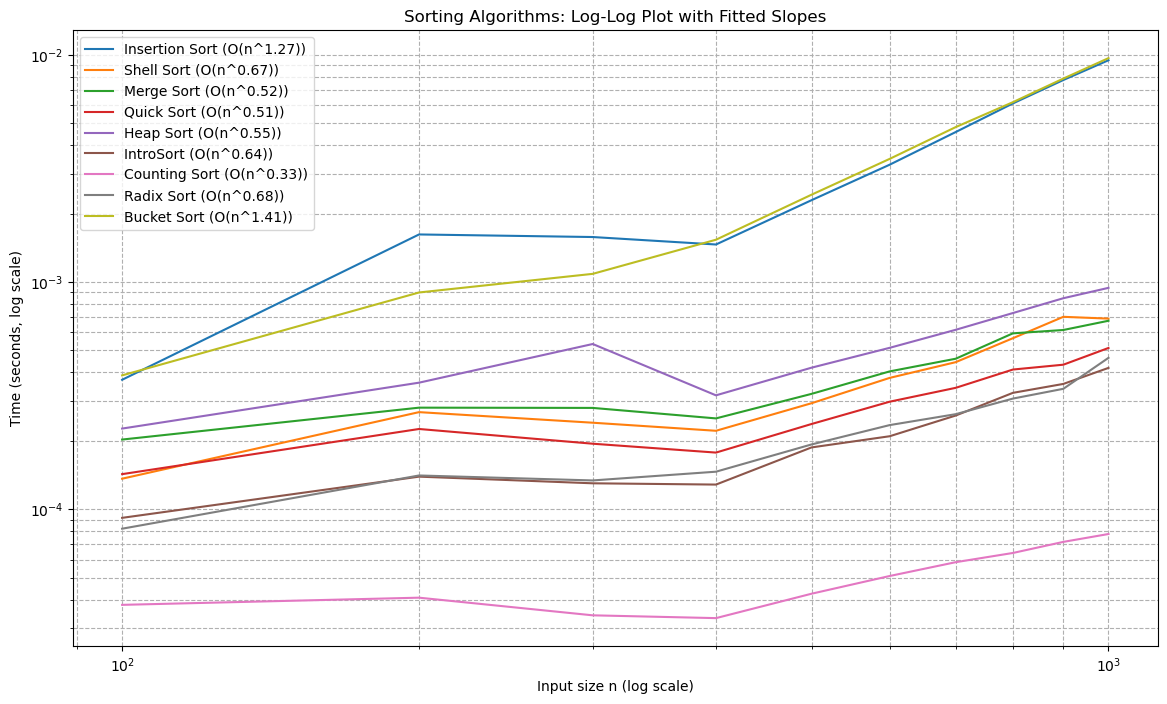


Expected Time Complexities:
- Insertion Sort: O(n^2)
- Shell Sort: ~O(n^(3/2)) depends on gap sequence
- Merge Sort: O(n log n)
- Quick Sort: O(n log n) average, O(n^2) worst
- Heap Sort: O(n log n)
- IntroSort: O(n log n)
- Counting Sort: O(n + k)
- Radix Sort: O(nk)
- Bucket Sort: O(n + k) average, O(n^2) worst



In [20]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# Algorithms dictionary
algorithms = {
    "Insertion Sort": insertion_sort,
    "Shell Sort": shell_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Heap Sort": heap_sort,
    "IntroSort": introsort,
    "Counting Sort": counting_sort,
    "Radix Sort": radix_sort,
    "Bucket Sort": bucket_sort
}

# Benchmarking
ns = range(100, 1100, 100)
times = {name: [] for name in algorithms}

for n in ns:
    test_data = [random.randint(0, n) for _ in range(n)]
    for name, algo in algorithms.items():
        arr = test_data.copy()
        start = time.time()
        if name == "IntroSort":
            introsort(arr)
        else:
            algo(arr)
        end = time.time()
        times[name].append(end - start)

# Plotting with slope fitting
plt.figure(figsize=(14, 8))
log_ns = np.log10(list(ns))

for name in algorithms:
    log_times = np.log10(times[name])
    slope, intercept = np.polyfit(log_ns, log_times, 1)
    plt.plot(ns, times[name], label=f"{name} (O(n^{slope:.2f}))")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input size n (log scale)')
plt.ylabel('Time (seconds, log scale)')
plt.title('Sorting Algorithms: Log-Log Plot with Fitted Slopes')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

# Expected theoretical complexities
print("""
Expected Time Complexities:
- Insertion Sort: O(n^2)
- Shell Sort: ~O(n^(3/2)) depends on gap sequence
- Merge Sort: O(n log n)
- Quick Sort: O(n log n) average, O(n^2) worst
- Heap Sort: O(n log n)
- IntroSort: O(n log n)
- Counting Sort: O(n + k)
- Radix Sort: O(nk)
- Bucket Sort: O(n + k) average, O(n^2) worst
""")

# Conclusion

In this notebook, we explored 10 of the most widely used sorting algorithms, categorized based on their strategies:  
simple sorts, divide and conquer sorts, heap-based sorts, and non-comparison-based sorts.

For each algorithm, we discussed:
- How it works,
- Practical examples,
- Applications and prevalence,
- Complexity analysis.

In the benchmarking section, we observed the empirical scaling behavior of each algorithm by plotting their runtime against input size on a log-log plot.  
The fitted slopes gave us a strong validation of the theoretical time complexities.

**Key Takeaways**:
- For small or nearly sorted datasets, Insertion Sort and Shell Sort perform reasonably well.
- Merge Sort and Quick Sort are fast and reliable for general-purpose large datasets.
- Heap Sort and IntroSort are robust when worst-case performance guarantees are needed.
- Counting Sort, Radix Sort, and Bucket Sort outperform comparison sorts in specific scenarios like integer or uniform distribution sorting.

Sorting remains a beautiful example of how algorithmic thinking translates into real-world performance!

---